# 🔍 Incident Classification with Random Forest
This notebook trains a Random Forest model on the reshaped multi-sensor dataset to classify incidents like Power Outage, Overheating, and Vibration Increase.

## 📥 Step 1: Load the Dataset

In [24]:
import pandas as pd

# Load the reshaped and labeled dataset
file_path = "../test_csv\motor_monitor_0_reshaped.csv"  # Adjust path if needed
df = pd.read_csv(file_path)
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Bryan\AppData\Local\Temp\ipykernel_383672\4072101703.py:4: SyntaxWarning: invalid escape sequence '\m'
  file_path = "../test_csv\motor_monitor_0_reshaped.csv"  # Adjust path if needed


,timestamp,power,rpm,temperature,vibration,is_anomaly,state,label
0,2025-04-07 00:00:00,4.761313,2.709206,22.0,7.625940,False,off,Normal
1,2025-04-07 00:01:00,4.411987,2.795459,22.0,7.408486,False,off,Normal
2,2025-04-07 00:02:00,4.107287,2.704222,22.0,7.501584,False,off,Normal
3,2025-04-07 00:03:00,5.405146,2.605857,22.0,7.220880,False,off,Normal
4,2025-04-07 00:04:00,4.166757,2.750449,22.0,7.605353,False,off,Normal


## 🧹 Step 2: Preprocessing the Data

In [25]:
# Drop timestamp and is_anomaly
df = df.drop(columns=["timestamp", "is_anomaly"])

# One-hot encode the 'state' column
df = pd.get_dummies(df, columns=["state"])
df.head()

,power,rpm,temperature,vibration,label,state_idle,state_off,state_run
0,4.761313,2.709206,22.0,7.625940,Normal,False,True,False
1,4.411987,2.795459,22.0,7.408486,Normal,False,True,False
2,4.107287,2.704222,22.0,7.501584,Normal,False,True,False
3,5.405146,2.605857,22.0,7.220880,Normal,False,True,False
4,4.166757,2.750449,22.0,7.605353,Normal,False,True,False


## 📊 Step 3: Prepare Features and Labels

In [26]:
X = df.drop("label", axis=1)
y = df["label"]

## 🔀 Step 4: Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 🧠 Step 5: Train the Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 📈 Step 6: Evaluate the Model

Classification Report:

                    precision    recall  f1-score   support

            Normal       1.00      1.00      1.00       272
       Overheating       1.00      1.00      1.00         6
      Power_outage       1.00      1.00      1.00         6
Vibration_increase       1.00      1.00      1.00         4

          accuracy                           1.00       288
         macro avg       1.00      1.00      1.00       288
      weighted avg       1.00      1.00      1.00       288



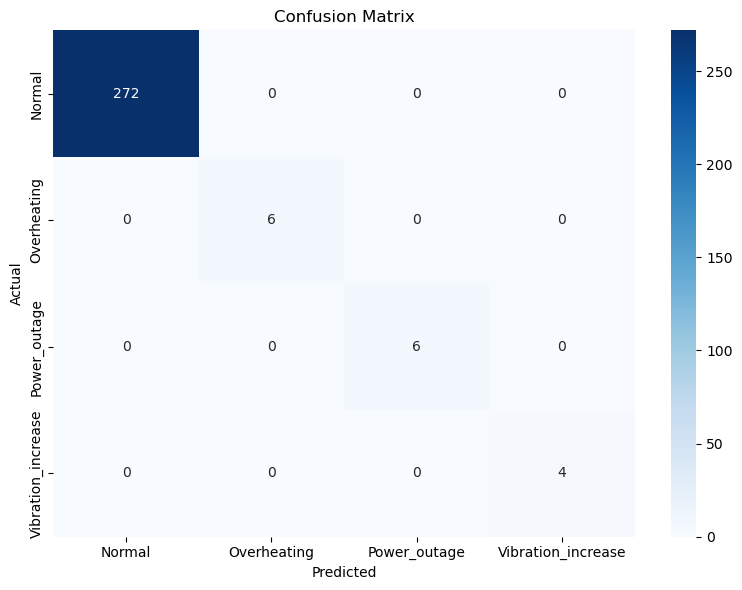

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [30]:
# 💾 Save the trained model
import joblib
joblib.dump(clf, "../test_cases/saved_models/random_forest.pkl")
print("✅ Model saved to: ../test_cases/saved_models/random_forest.pkl")

✅ Model saved to: ../test_cases/saved_models/random_forest.pkl


In [31]:
print(X_train.head())

           power         rpm  temperature   vibration  state_idle  state_off  \
535     5.662207    2.285401    22.000000    8.112557       False       True   
1369  135.568934  119.169254    62.808486  101.972213       False      False   
720   132.004053  118.583522    60.217522  101.463357       False      False   
136   122.135142  112.836978    55.683753  100.446227       False      False   
242   133.666671  117.918876    62.388272  101.815447       False      False   

      state_run  
535       False  
1369       True  
720        True  
136        True  
242        True  
